In [13]:
#import DownloadData
import datetime
import datetime as dt#  --->NameError: name 'datetime' is not defined
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DownloadData_v2

from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns

import os
import importlib.machinery
import sys

cwd = os.getcwd()

#sys.path #returns all working directories 
print(cwd)
sys.path

C:\Users\cp85vc


['C:\\Users\\cp85vc',
 'C:\\Users\\cp85vc\\Anaconda3\\python38.zip',
 'C:\\Users\\cp85vc\\Anaconda3\\DLLs',
 'C:\\Users\\cp85vc\\Anaconda3\\lib',
 'C:\\Users\\cp85vc\\Anaconda3',
 '',
 'C:\\Users\\cp85vc\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\cp85vc\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\cp85vc\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\cp85vc\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\cp85vc\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\cp85vc\\.ipython']

In [91]:
start = dt.datetime(1999, 1, 1)
end = dt.datetime.today()
frequency = 'DAILY'

secs = ['SPX Index','AUDUSD Curncy', 'EURUSD Curncy', 'USDCNH Curncy', 'IHN+1M Curncy', 'PPN+1M Curncy', 'NTN+1M Curncy']

df = {} #dictionary , with each key being one of the secs above
i = 0 
sec_obj = []

for sec in secs:
    print(secs[i])
    sec_obj.append('')#init
    sec_obj[i] = DownloadData_v2.DownloadData(pair = secs[i], fields = ['PX_LAST'], startDate = start, \
                                       endDate = end, \
                                       period = frequency, \
                                       source = 'blp')
    #print(sec_obj.get_data_blp_historical()
    df[sec] = []
    df[sec] = sec_obj[i].get_data_blp_historical()
    df[sec][sec+str('_ret')] = np.log(df[sec]['PX_LAST']/df[sec]['PX_LAST'].shift(1))
    df[sec][sec+'_ret'][0] = 0.0
    i += 1 
    
print(df[secs[0]].isnull().sum())
print(df.keys())
df['SPX Index'].tail()

SPX Index
2021-08-12 16:05:15.870692
AUDUSD Curncy
2021-08-12 16:05:15.870692
EURUSD Curncy
2021-08-12 16:05:15.870692
USDCNH Curncy
2021-08-12 16:05:15.870692
IHN+1M Curncy
2021-08-12 16:05:15.870692
PPN+1M Curncy
2021-08-12 16:05:15.870692
NTN+1M Curncy
2021-08-12 16:05:15.870692
PX_LAST          0
SPX Index_ret    0
dtype: int64
dict_keys(['SPX Index', 'AUDUSD Curncy', 'EURUSD Curncy', 'USDCNH Curncy', 'IHN+1M Curncy', 'PPN+1M Curncy', 'NTN+1M Curncy'])


,PX_LAST,SPX Index_ret
date,,
2021-08-05,4429.10,0.005987
2021-08-06,4436.52,0.001674
2021-08-09,4432.35,-0.000940
2021-08-10,4436.75,0.000992
2021-08-11,4447.70,0.002465


In [92]:
df_monthly = {} #anothe contianer 

for sec in secs:
    df_monthly[sec] = []#0 #init
    df_monthly[sec] = df[sec].resample('M').last()
    df_monthly[sec][sec+str('_ret_monthly')] = np.log(df_monthly[sec]['PX_LAST']/df_monthly[sec]['PX_LAST'].shift(1))
    df_monthly[sec][sec+str('_ret_monthly')][0] = 0.0
    
df_monthly['SPX Index'].tail()

,PX_LAST,SPX Index_ret,SPX Index_ret_monthly
date,,,
2021-04-30,4181.17,-0.007221,0.051097
2021-05-31,4204.11,0.000769,0.005472
2021-06-30,4297.50,0.001327,0.021971
2021-07-31,4395.26,-0.005421,0.022493
2021-08-31,4447.70,0.002465,0.011860


In [94]:
#inspect
which = 'USDCNH Curncy'
pivot = pd.pivot_table(data = df_monthly[which], index = df_monthly[which].index.year, \
                      columns = df_monthly[which].index.month, values = which+str('_ret_monthly'))
pivot

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.022691,-0.006438,0.011258,-0.011334
2011,0.001139,-0.002888,-0.003202,-0.013531,0.003169,-0.002240,-0.005506,-0.011497,0.021555,-0.016267,0.000203,-0.007381
2012,-0.006483,-0.001032,0.002854,-0.002299,0.010421,-0.001021,0.002434,-0.003772,-0.007903,-0.009487,-0.004496,0.001608
2013,-0.001930,0.001448,-0.002656,-0.006711,-0.002014,-0.002230,-0.000766,-0.002564,0.000049,-0.004210,-0.001068,-0.004579
2014,-0.003258,0.013557,0.015469,0.006032,-0.000800,-0.006713,-0.004085,-0.005028,0.004834,-0.008320,0.005273,0.009065
2015,0.010720,0.000589,-0.013015,0.000338,-0.000919,0.000741,0.002285,0.034985,-0.012338,-0.006574,0.016192,0.022089
2016,0.003799,-0.006314,-0.013553,0.003552,0.015237,0.012778,-0.006089,0.009128,-0.002169,0.014969,0.020229,0.008624
2017,-0.021531,0.004078,0.002346,0.003965,-0.022368,0.005101,-0.007936,-0.019590,0.007581,-0.002169,-0.003202,-0.014765
2018,-0.033688,0.005162,-0.010735,0.008299,0.014727,0.034699,0.025238,0.005948,0.004402,0.014223,-0.003533,-0.011490


In [95]:
pivot.append(pivot.describe())

date,1,2,3,4,5,6,7,8,9,10,11,12
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.022691,-0.006438,0.011258,-0.011334
2011,0.001139,-0.002888,-0.003202,-0.013531,0.003169,-0.002240,-0.005506,-0.011497,0.021555,-0.016267,0.000203,-0.007381
2012,-0.006483,-0.001032,0.002854,-0.002299,0.010421,-0.001021,0.002434,-0.003772,-0.007903,-0.009487,-0.004496,0.001608
2013,-0.001930,0.001448,-0.002656,-0.006711,-0.002014,-0.002230,-0.000766,-0.002564,0.000049,-0.004210,-0.001068,-0.004579
2014,-0.003258,0.013557,0.015469,0.006032,-0.000800,-0.006713,-0.004085,-0.005028,0.004834,-0.008320,0.005273,0.009065
2015,0.010720,0.000589,-0.013015,0.000338,-0.000919,0.000741,0.002285,0.034985,-0.012338,-0.006574,0.016192,0.022089
2016,0.003799,-0.006314,-0.013553,0.003552,0.015237,0.012778,-0.006089,0.009128,-0.002169,0.014969,0.020229,0.008624
2017,-0.021531,0.004078,0.002346,0.003965,-0.022368,0.005101,-0.007936,-0.019590,0.007581,-0.002169,-0.003202,-0.014765
2018,-0.033688,0.005162,-0.010735,0.008299,0.014727,0.034699,0.025238,0.005948,0.004402,0.014223,-0.003533,-0.011490
2019,-0.023727,-0.000910,0.002949,0.002050,0.029226,-0.009982,0.006097,0.035876,-0.002936,-0.013364,-0.002216,-0.009891


In [85]:

df = pd.pivot_table(data = sec_annual, index = sec_annual.index.year, columns = sec_annual.index.month, values = 'ret')
df

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2001,NaN,NaN,NaN,0.083934,-0.052186,0.029472,-0.177392,-0.071881,0.090851,0.078596,-0.005650,-0.016183
2002,0.000959,-0.014000,-0.039668,-0.045533,-0.073579,0.005682,0.038894,-0.022597,0.013839,0.029255,-0.031456,-0.002206
2003,-0.011105,0.002231,0.002782,-0.028742,-0.043231,-0.003589,0.029518,-0.005249,-0.010582,0.009763,0.001170,-0.002693
2004,-0.002347,-0.000588,0.012270,0.020121,0.063400,0.008511,-0.026296,0.020985,-0.020985,-0.007642,-0.009912,0.029983
2005,-0.015152,0.010846,0.024298,0.009118,-0.003658,0.033465,-0.001013,0.064760,-0.010026,-0.024777,-0.007901,-0.026119
2006,-0.043689,-0.021495,-0.008729,-0.031731,0.056624,-0.017251,-0.012255,0.006256,0.013583,-0.013255,0.002949,-0.018824
2007,0.013685,0.005684,-0.003822,-0.004936,-0.027872,0.022912,0.020128,0.017817,-0.031008,-0.000439,0.023972,0.007475
2008,-0.015006,-0.020181,0.016936,0.004864,0.007519,-0.008598,-0.020390,0.011718,0.045753,0.179023,0.095310,-0.108439
2009,0.045639,0.054864,-0.061621,-0.099259,-0.035242,-0.005834,-0.031702,0.022887,-0.053548,0.000311,-0.011269,-0.013416


In [90]:
%timeit df[df> 0].count()
%timeit (df > 0).apply(np.count_nonzero)


1.87 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.22 ms ± 62.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
df.describe()

date,1,2,3,4,5,6,7,8,9,10,11,12
count,20.000000,20.000000,20.000000,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.004384,0.002744,0.000655,-0.007836,0.000728,0.002510,-0.007769,0.012381,0.010336,0.004912,0.006012,-0.006007
std,0.020512,0.026404,0.034901,0.036786,0.036240,0.019047,0.043065,0.033024,0.036434,0.050739,0.035017,0.029429
min,-0.043689,-0.049916,-0.061621,-0.099259,-0.073579,-0.035102,-0.177392,-0.071881,-0.053548,-0.065554,-0.061304,-0.108439
25%,-0.015042,-0.015545,-0.015659,-0.015513,-0.027872,-0.009205,-0.012255,-0.003388,-0.012404,-0.014133,-0.008404,-0.016843
50%,-0.005714,0.000822,-0.000480,-0.002766,0.000286,0.003069,-0.001013,0.011718,0.005434,-0.000064,0.001610,-0.002450
75%,0.003058,0.018422,0.011228,0.004864,0.022116,0.013766,0.012457,0.020985,0.023659,0.008030,0.017289,0.009115
max,0.045639,0.054864,0.119263,0.083934,0.063400,0.033465,0.038894,0.093048,0.090851,0.179023,0.095310,0.031156


          mean       sum
date                    
1    -0.004384 -0.087671
2     0.002744  0.054887
3     0.000655  0.013107
4    -0.007836 -0.164559
5     0.000728  0.015289
6     0.002510  0.052720
7    -0.007769 -0.163150
8     0.012381  0.259999
9     0.010336  0.206728
10    0.004912  0.098247
11    0.006012  0.120238
12   -0.006007 -0.120136


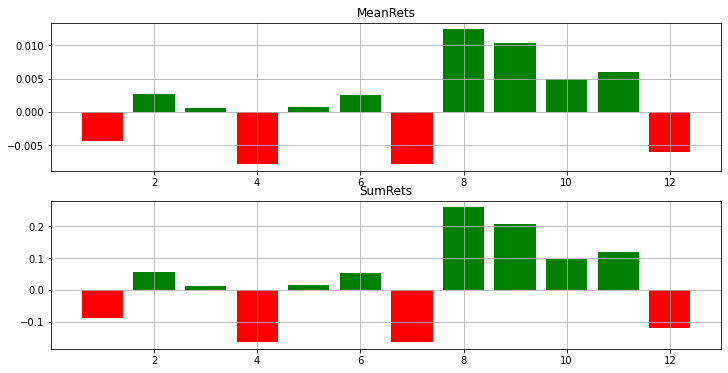

In [9]:
plt.figure(figsize=(12, 6)) #this has to be the first 
plt.grid(True)
plt.subplot(211) # 1st plot settings start here: (*nrows*, *ncols*, *index*/position)

y_mean = pd.pivot_table(data = sec_annual, index = sec_annual.index.year, \
               columns = sec_annual.index.month, values = 'ret').mean() #.plot(kind = 'bar', grid = True, figsize = (12, 3))

y_sum = pd.pivot_table(data = sec_annual, index = sec_annual.index.year, \
               columns = sec_annual.index.month, values = 'ret').sum()

y = pd.DataFrame({'mean': y_mean,
                    'sum': y_sum})

print(y)
x = y.index #months 1 to t12

coloring = []
for val in y.iloc[:,0]:
    if val < 0:
        coloring.append('red')
    else:
        coloring.append('green')
        
plt.bar(x, y.iloc[:, 0], color = coloring)
plt.grid(True)
plt.title('MeanRets', fontdict = {'fontsize': 12}, loc = 'center')

plt.subplot(212)
plt.grid(True)
for val in y.iloc[:,1]:
    if val < 0:
        coloring.append('red')
    else:
        coloring.append('green')
plt.bar(x, y.iloc[:, 1], color =coloring )
plt.title('SumRets', fontdict = {'fontsize': 12}, loc = 'center')
plt.show()

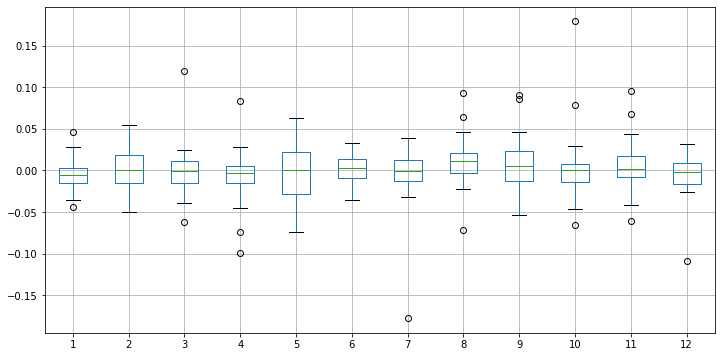

In [10]:
pd.pivot_table(data = sec_annual, index = sec_annual.index.year, \
               columns = sec_annual.index.month, values = 'ret').plot(kind = 'box', grid = True, figsize = (12, 6))

In [97]:
70 * 0.7e6/15e3


3266.6666666666665

In [98]:
70/15e3

0.004666666666666667